R environment

In [ ]:
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(data.table)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    set.seed(123)
})

In [ ]:
use_condaenv("scarches")
sc <- import("scanpy")

In [ ]:
gbm_latent <- sc$read_h5ad("data/clustering_query_GB_datasets.h5ad")

In [ ]:
gbm_mapped <- readRDS('data/query_GB_datasets.rds')

In [ ]:
adata <- sc$read_h5ad('data/query_GB_datasets.h5ad')

In [ ]:
embedding <- gbm_latent$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list() # obs_names from gbm_latent does not have cellIDs (only indexes)
colnames(embedding) <- c("UMAP_1", "UMAP_2")
rownames(embedding) <- substr(rownames(embedding),1,nchar(rownames(embedding))-2)

In [ ]:
gbm_mapped[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")

Warning message:
“No assay specified, setting assay as RNA by default.”


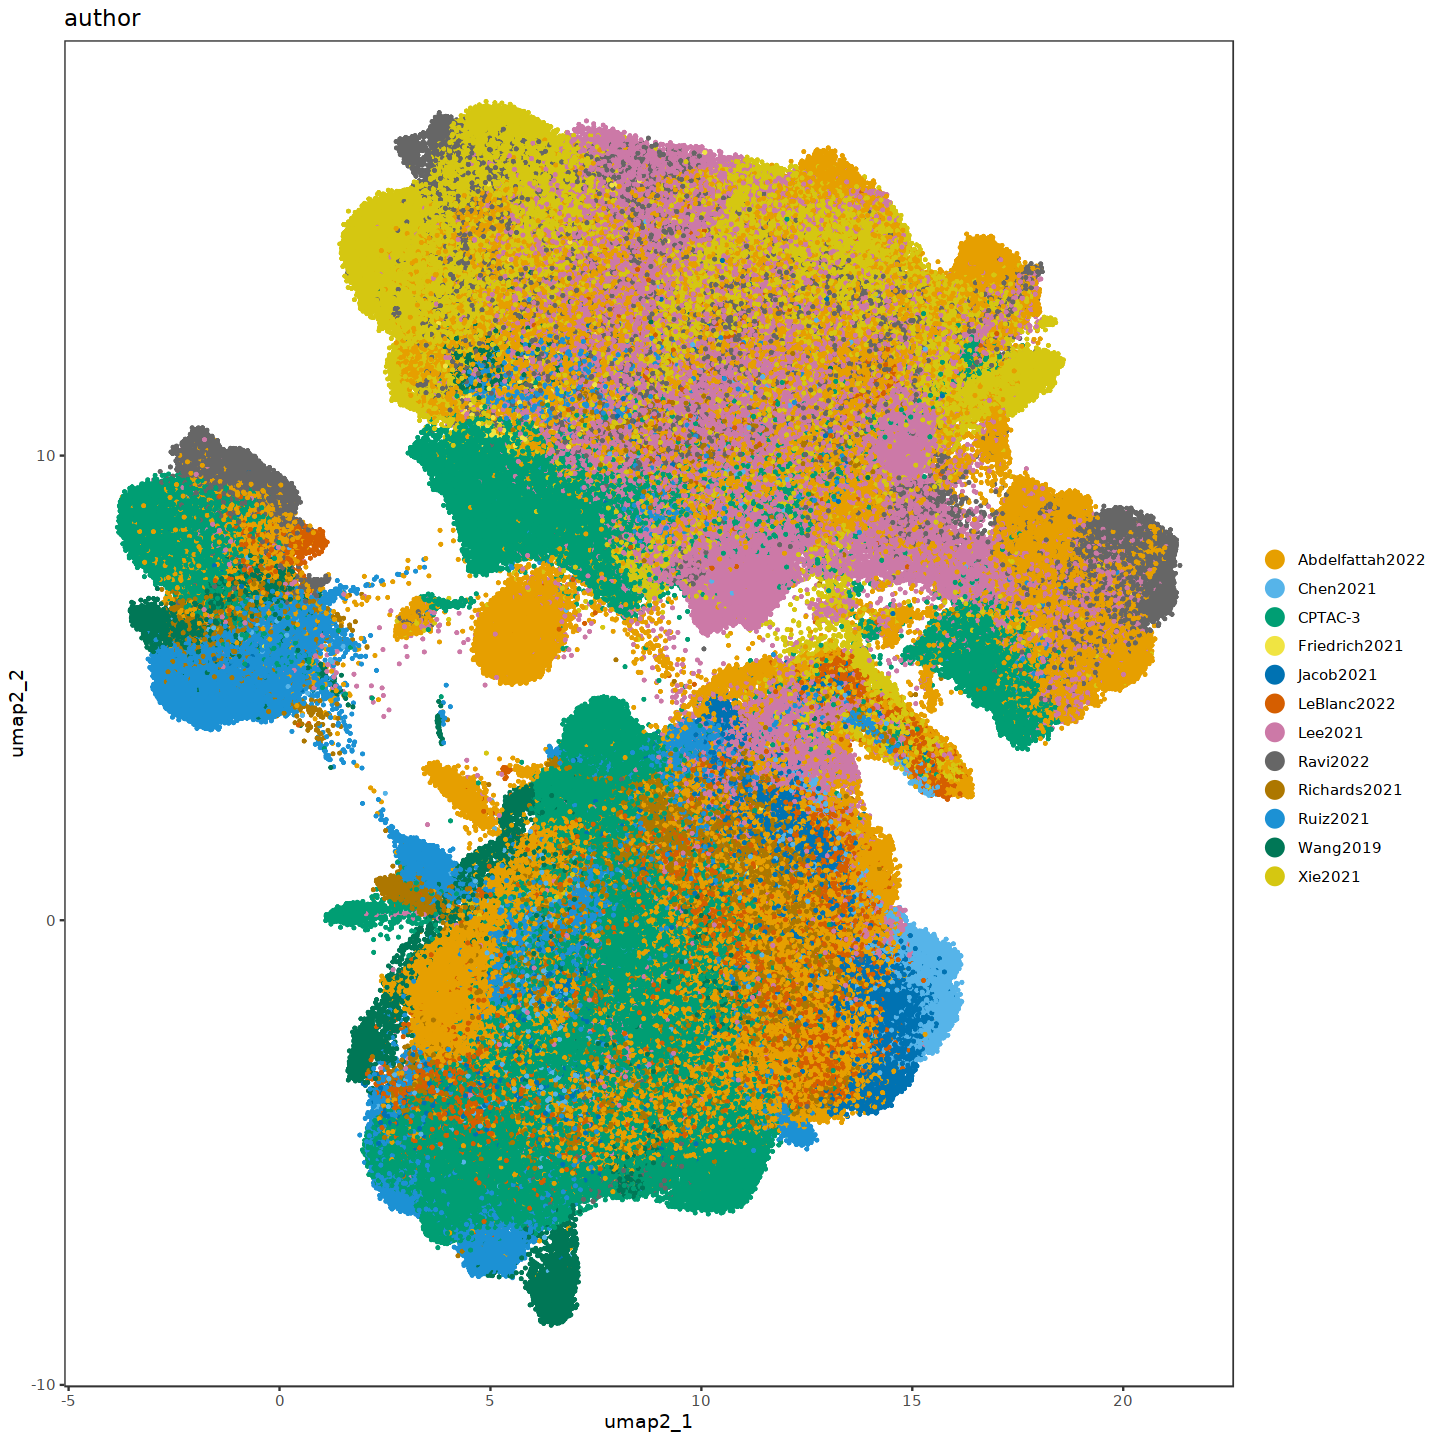

In [ ]:
options(repr.plot.height = 12, repr.plot.width = 12)
dittoDimPlot(gbm_mapped, 
             reduction.use = "umap", var = "author", 
             order = 'randomize',
             do.label = F, labels.size = 3, size = 1,
            do.raster = TRUE)

In [ ]:
ggsave('figures/new_studies_by_author.pdf', height = 9,
       width = 10)

Plot was finally organized in Illustrator